In [13]:
import numpy as np

s1 = np.random.normal(0, 0.1, 1000)
s2 = np.random.normal(2, 0.5, 1000)
s3 = np.random.normal(-1, 0.8, 1000)
x = np.array([s1, s2, s3]).T  # concatenate the 3 sources of gaussians
S = np.exp(x) # raise it exponentialy
rng = np.random.default_rng()
M = rng.standard_normal(size=(3,3)) # generate random mixing matrix to record the 4 sources using 3 sensors
X = np.dot(S,M) # mix the four sources

No handles with labels found to put in legend.


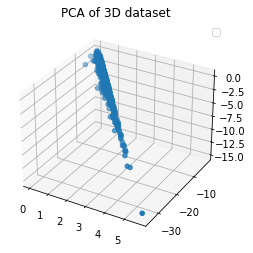

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])


plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of 3D dataset")
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
X_PCA = pipe.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

In [38]:
pca.mean_

array([-1.71299086e-15,  1.76081372e-15, -5.52030643e-16])

In [68]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=4,
                    shrinkA=0, shrinkB=0, color='black')
    for i, j in zip(v1, v0):
        ax.annotate('', (i, j), arrowprops=arrowprops)

'\nfig.savefig(\'figures/05.09-PCA-rotation.png\')\n\n\n#ax = fig.add_subplot(projection=\'3d\')\nax.scatter(X_PCA[:,0], X_PCA[:,1])\n\n\nplt.legend(loc="best", shadow=False, scatterpoints=1)\nplt.title("PCA of 3D dataset")\n\nfor length, vector in zip(pca.explained_variance_, pca.components_):\n    v = vector * 3 * np.sqrt(length)\n    print(v)\n    draw_vector(pca.mean_, pca.mean_ + v)\nplt.axis(\'equal\');\n\n'

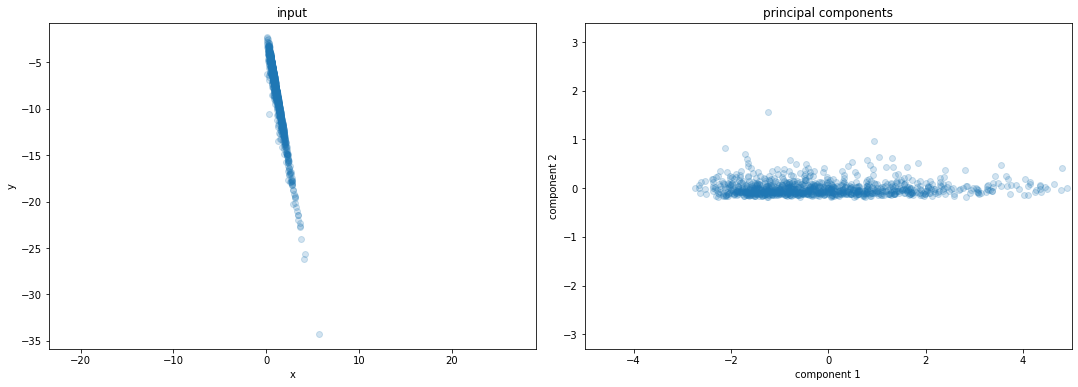

In [69]:

import plotly.express as px
from sklearn.decomposition import PCA


    
fig = px.scatter_matrix(
    X_PCA,
    dimensions=range(3),
    title=f'Total Explained Variance: {total_var:.2f}%',
)

fig.update_traces(diagonal_visible=False)
fig.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)


# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components

ax[1].scatter(X_PCA[:, 0], X_PCA[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))
'''
fig.savefig('figures/05.09-PCA-rotation.png')


#ax = fig.add_subplot(projection='3d')
ax.scatter(X_PCA[:,0], X_PCA[:,1])


plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of 3D dataset")

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    print(v)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

'''

No handles with labels found to put in legend.


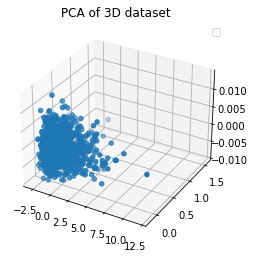

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_PCA[:,0],X_PCA[:,1], X_PCA[:,2])


plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of 3D dataset")
plt.show()